In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv('/content/winequalityN.csv')
df = df.sample(frac=1)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
482,white,5.8,0.25,0.24,13.3,0.044,41.0,137.0,0.99720,3.34,0.42,9.5,5
5025,red,8.1,1.33,0.00,1.8,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5
4709,white,5.9,0.21,0.31,1.8,0.033,45.0,142.0,0.98984,3.35,0.50,12.7,6
2370,white,6.3,0.10,0.24,6.0,0.039,25.0,107.0,0.99511,3.59,0.49,10.5,7
3452,white,8.0,0.24,0.48,6.8,0.047,13.0,134.0,0.99616,3.23,0.70,10.0,5


In [67]:
df.shape

(6497, 13)

In [68]:
k = len(df.keys())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


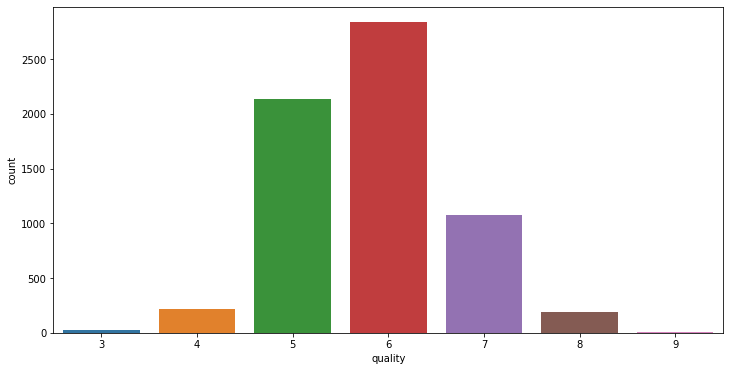

In [69]:
plt.figure(figsize = (12,6))
sns.countplot(df['quality'])
plt.show()

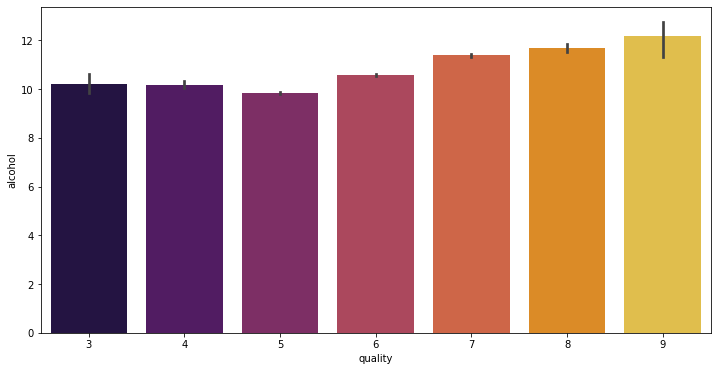

In [70]:
plt.figure(figsize = (12,6))
sns.barplot(x='quality', y = 'alcohol', data = df, palette = 'inferno')
plt.show()

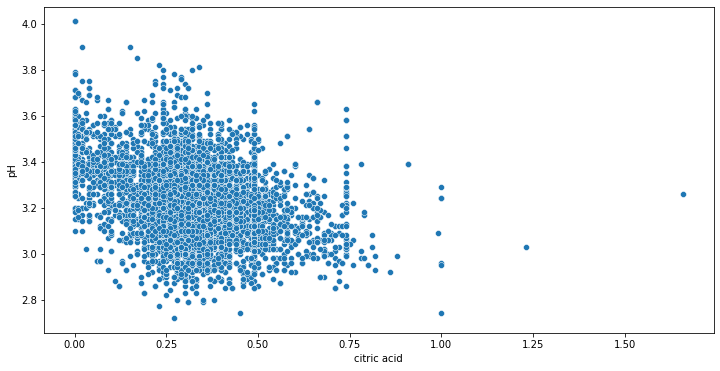

In [71]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='citric acid', y = 'pH', data = df, palette = 'inferno')
plt.show()

<Figure size 864x432 with 0 Axes>

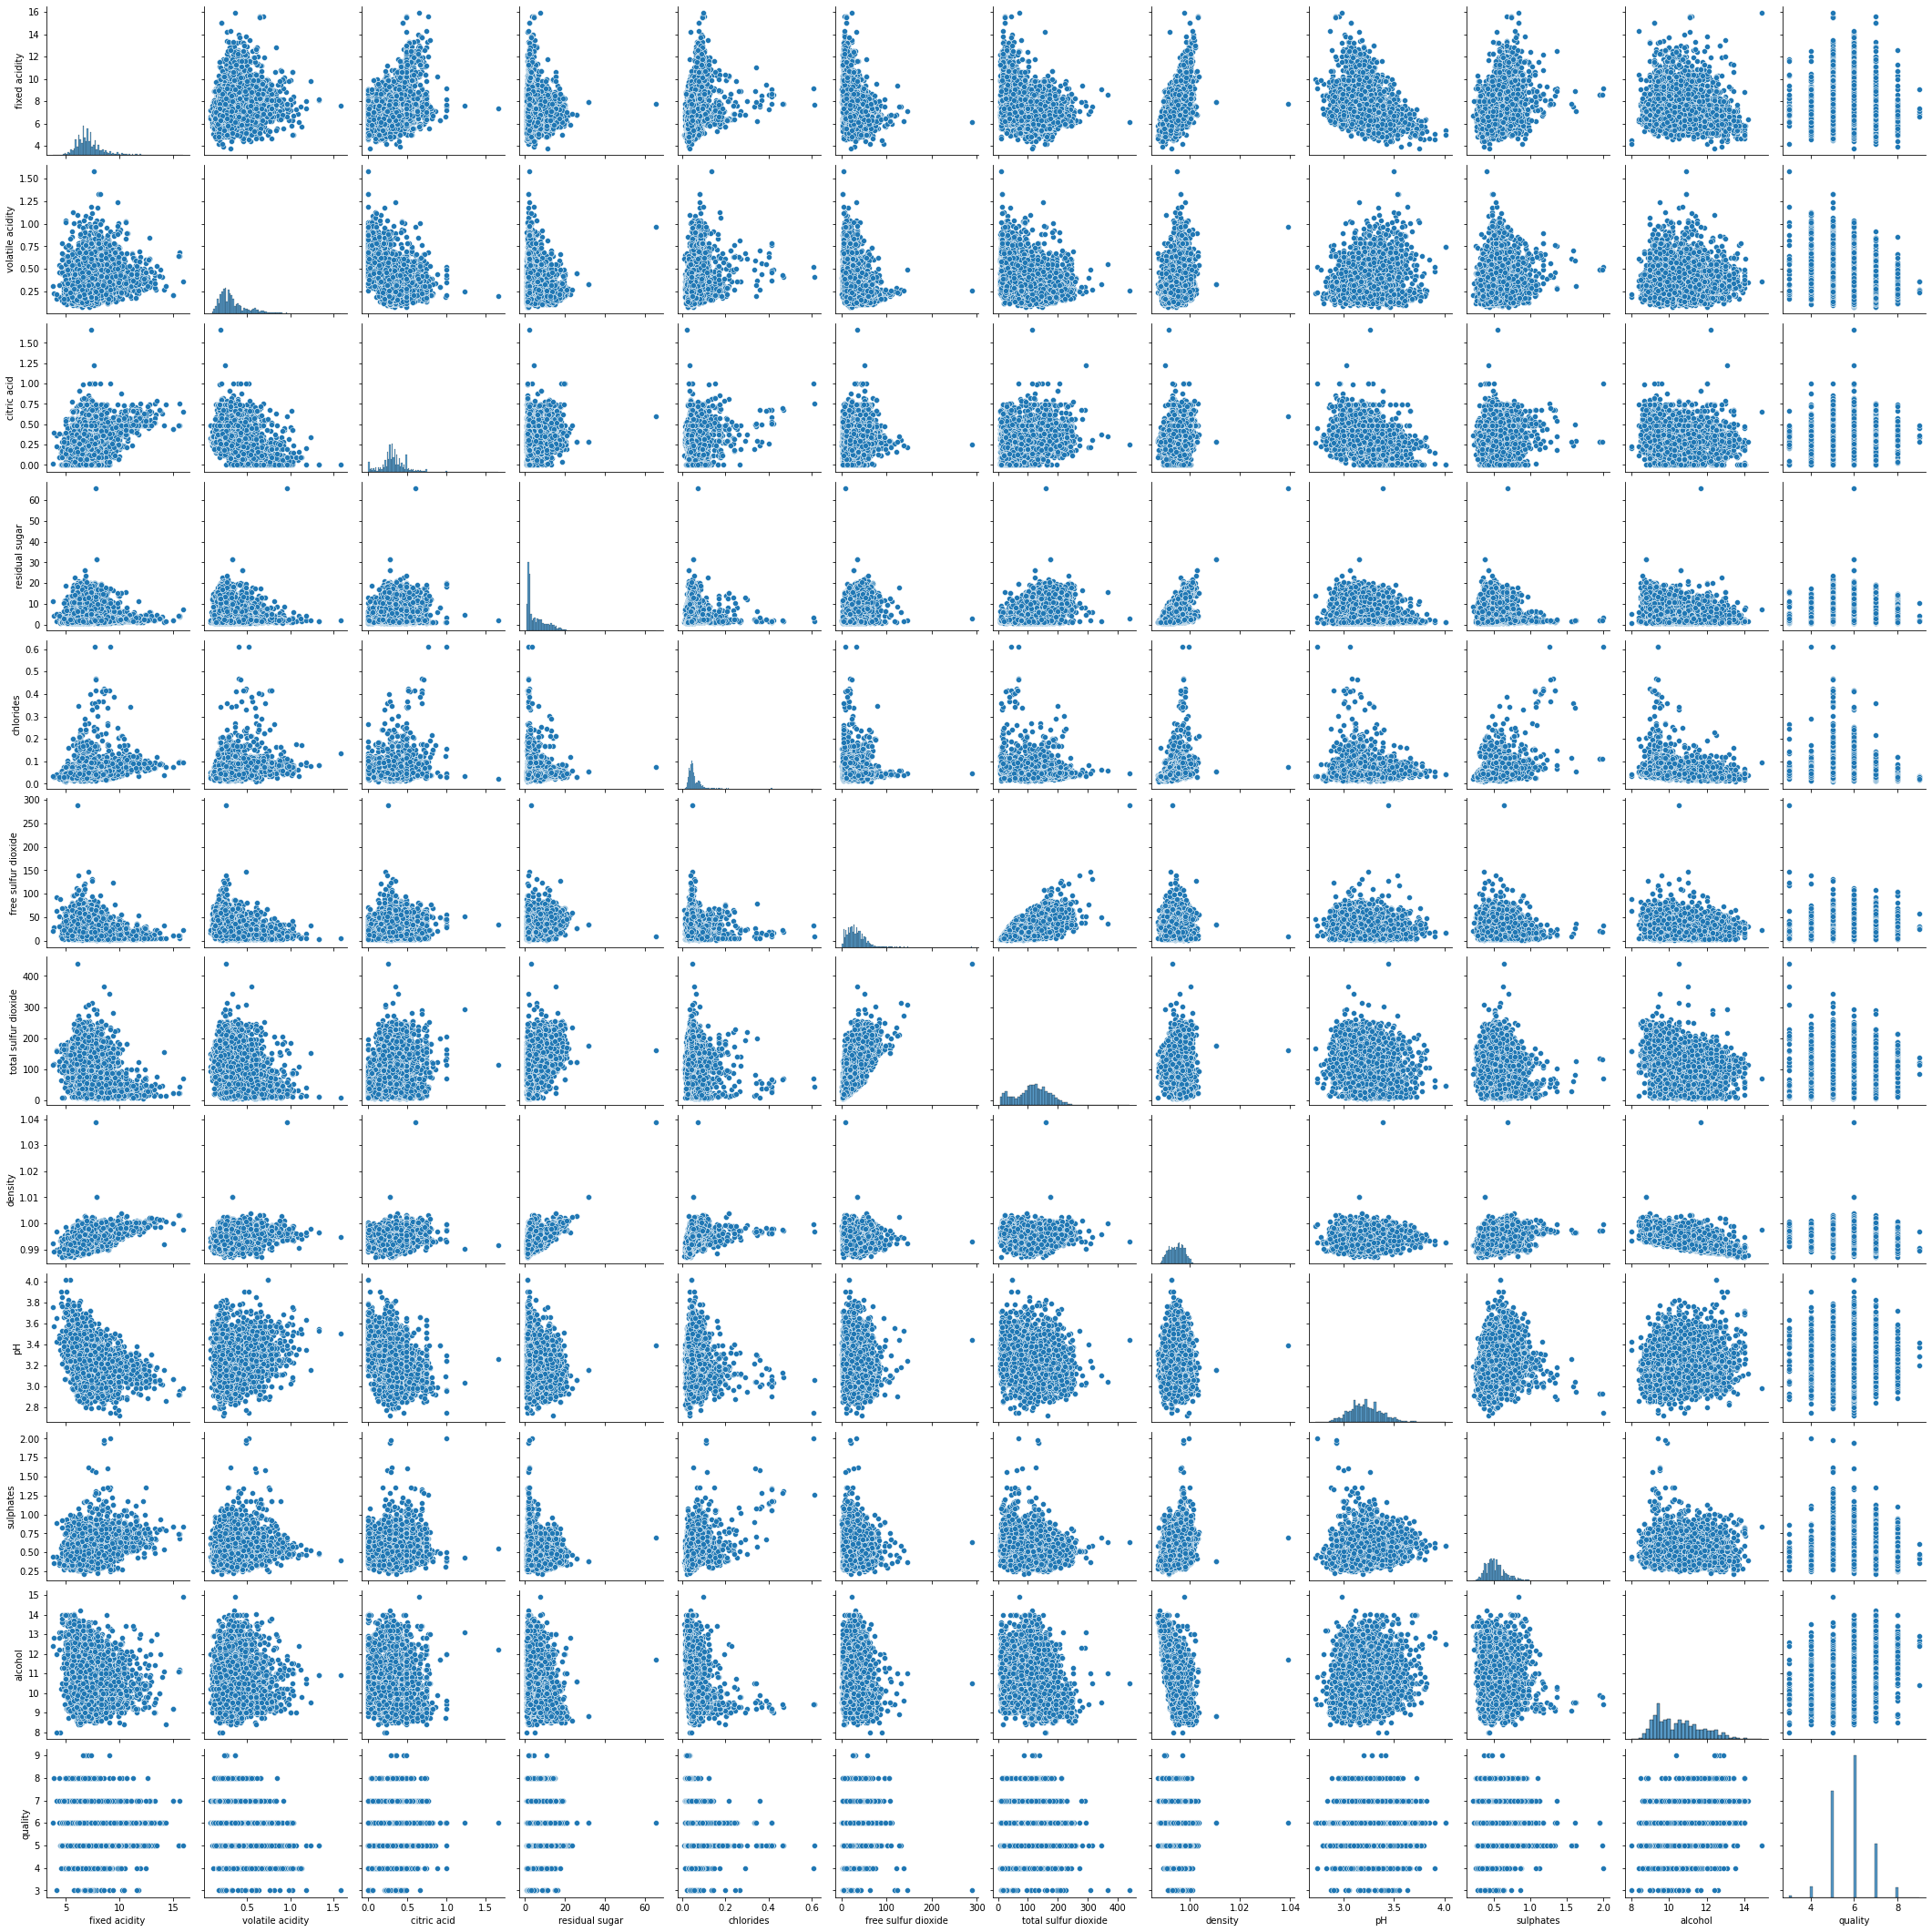

In [72]:
plt.figure(figsize = (12,6))
sns.pairplot(df)
plt.show()

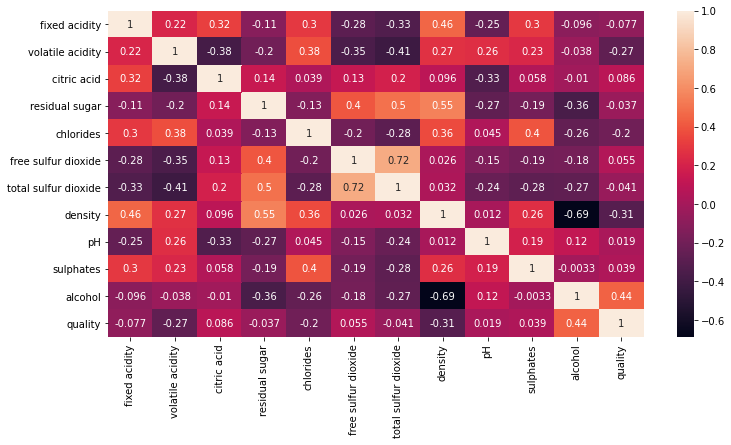

In [73]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(),annot=True)
plt.show()


In [74]:

df = df.dropna()

x = df.drop(['quality','type'], axis=1)
y = df['quality']


In [75]:
## oversampling
from imblearn.over_sampling import SMOTE
x_res,y_res = SMOTE(k_neighbors=4).fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.2, random_state=0)

In [77]:
print(x_train.shape)
print(x_test.shape)
x_train

(15792, 11)
(3948, 11)


array([[ 8.3       ,  0.39      ,  0.7       , ...,  3.09      ,
         0.57      ,  9.4       ],
       [ 7.25200117,  0.27551972,  0.35408005, ...,  3.28      ,
         0.44448028, 12.55919953],
       [ 6.7       ,  0.24      ,  0.31      , ...,  3.29      ,
         0.46      , 12.9       ],
       ...,
       [ 7.91083178,  0.8489555 ,  0.01334623, ...,  3.40114119,
         0.45332689, 10.00038677],
       [ 8.7752732 ,  0.95335155,  0.05906649, ...,  3.29835155,
         0.44123634,  9.61648453],
       [ 6.3       ,  0.23      ,  0.5       , ...,  2.86      ,
         0.46      ,  9.1       ]])

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
scaler = StandardScaler()
lr = LogisticRegression(solver='lbfgs', max_iter=300)

pipe = make_pipeline(scaler,lr)
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=300,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [79]:
Y_pred_lr = pipe.predict(x_test)
accuracy_score(y_test,Y_pred_lr)

0.5220364741641338

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)
accuracy_score(y_test,dt.predict(x_test))

pipe = make_pipeline(scaler,dt)
pipe.fit(x_train,y_train)

accuracy_score(y_test, pipe.predict(x_test))

0.8118034447821681

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)

pipe = make_pipeline(scaler,rf)
pipe.fit(x_train,y_train)
accuracy_score(y_test, pipe.predict(x_test))*100

89.43768996960486

## saving the decision tree model

In [82]:
import pickle
lr_file_model = open("dt_model.pkl","wb")
pickle.dump(pipe,lr_file_model)

In [83]:
y_train.shape

(15792,)

In [84]:
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from keras import Sequential


def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
  ])

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
  return model

In [85]:
model = build_model()

checkpoint_filepath = '/content/drive/MyDrive/cp'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
history = model.fit(
  x_train, y_train,
  batch_size = 4000,
  callbacks=[model_checkpoint_callback],
  epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 5ms/step - loss: 84.4358 - mae: 7.4127 - mse: 84.4358


Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 34.0208 - mae: 4.2056 - mse: 34.0208


Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 12.9141 - mae: 2.6512 - mse: 12.9141


Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 12.9320 - mae: 3.0780 - mse: 12.9320


Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 8.8694 - mae: 2.4709 - mse: 8.8694


Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 7.9367 - mae: 2.1384 - mse: 7.9367


Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 6.8203 - mae: 2.0191 - mse: 6.8203


Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 5.7537 - mae: 1.9519 - mse: 5.7537


Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 4.9106 - mae: 1.7906 - mse: 4.9106


Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 4.2397 - mae: 1.6738 - mse: 4.2397


Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 3.7186 - mae: 1.6193 - mse: 3.7186


Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 3.2999 - mae: 1.5226 - mse: 3.2999


Epoch 13/100
4/4 [==============================] - 0s 6ms/step - loss: 3.0038 - mae: 1.4656 - mse: 3.0038


Epoch 14/100
4/4 [==============================] - 0s 5ms/step - loss: 2.7915 - mae: 1.4051 - mse: 2.7915


Epoch 15/100
4/4 [==============================] - 0s 4ms/step - loss: 2.6462 - mae: 1.3726 - mse: 2.6462


Epoch 16/100
4/4 [==============================] - 0s 4ms/step - loss: 2.5349 - mae: 1.3374 - mse: 2.5349


Epoch 17/100
4/4 [==============================] - 0s 4ms/step - loss: 2.4484 - mae: 1.3185 - mse: 2.4484


Epoch 18/100
4/4 [==============================] - 0s 4ms/step - loss: 2.3741 - mae: 1.2949 - mse: 2.3741


Epoch 19/100
4/4 [==============================] - 0s 4ms/step - loss: 2.3283 - mae: 1.2814 - mse: 2.3283


Epoch 20/100
4/4 [==============================] - 0s 4ms/step - loss: 2.2918 - mae: 1.2660 - mse: 2.2918


Epoch 21/100
4/4 [==============================] - 0s 4ms/step - loss: 2.2569 - mae: 1.2560 - mse: 2.2569


Epoch 22/100
4/4 [==============================] - 0s 4ms/step - loss: 2.2318 - mae: 1.2471 - mse: 2.2318


Epoch 23/100
4/4 [==============================] - 0s 4ms/step - loss: 2.2113 - mae: 1.2388 - mse: 2.2113


Epoch 24/100
4/4 [==============================] - 0s 4ms/step - loss: 2.1839 - mae: 1.2303 - mse: 2.1839


Epoch 25/100
4/4 [==============================] - 0s 4ms/step - loss: 2.1611 - mae: 1.2227 - mse: 2.1611


Epoch 26/100
4/4 [==============================] - 0s 4ms/step - loss: 2.1368 - mae: 1.2151 - mse: 2.1368


Epoch 27/100
4/4 [==============================] - 0s 6ms/step - loss: 2.1159 - mae: 1.2099 - mse: 2.1159


Epoch 28/100
4/4 [==============================] - 0s 5ms/step - loss: 2.0968 - mae: 1.2044 - mse: 2.0968


Epoch 29/100
4/4 [==============================] - 0s 4ms/step - loss: 2.0780 - mae: 1.1979 - mse: 2.0780


Epoch 30/100
4/4 [==============================] - 0s 4ms/step - loss: 2.0598 - mae: 1.1927 - mse: 2.0598


Epoch 31/100
4/4 [==============================] - 0s 4ms/step - loss: 2.0431 - mae: 1.1876 - mse: 2.0431


Epoch 32/100
4/4 [==============================] - 0s 5ms/step - loss: 2.0272 - mae: 1.1835 - mse: 2.0272


Epoch 33/100
4/4 [==============================] - 0s 5ms/step - loss: 2.0104 - mae: 1.1788 - mse: 2.0104


Epoch 34/100
4/4 [==============================] - 0s 4ms/step - loss: 1.9978 - mae: 1.1739 - mse: 1.9978


Epoch 35/100
4/4 [==============================] - 0s 4ms/step - loss: 1.9824 - mae: 1.1684 - mse: 1.9824


Epoch 36/100
4/4 [==============================] - 0s 4ms/step - loss: 1.9673 - mae: 1.1640 - mse: 1.9673


Epoch 37/100
4/4 [==============================] - 0s 5ms/step - loss: 1.9554 - mae: 1.1607 - mse: 1.9554


Epoch 38/100
4/4 [==============================] - 0s 4ms/step - loss: 1.9406 - mae: 1.1564 - mse: 1.9406


Epoch 39/100
4/4 [==============================] - 0s 5ms/step - loss: 1.9280 - mae: 1.1524 - mse: 1.9280


Epoch 40/100
4/4 [==============================] - 0s 5ms/step - loss: 1.9145 - mae: 1.1487 - mse: 1.9145


Epoch 41/100
4/4 [==============================] - 0s 4ms/step - loss: 1.9033 - mae: 1.1440 - mse: 1.9033


Epoch 42/100
4/4 [==============================] - 0s 4ms/step - loss: 1.8883 - mae: 1.1383 - mse: 1.8883


Epoch 43/100
4/4 [==============================] - 0s 4ms/step - loss: 1.8779 - mae: 1.1356 - mse: 1.8779


Epoch 44/100
4/4 [==============================] - 0s 4ms/step - loss: 1.8652 - mae: 1.1324 - mse: 1.8652


Epoch 45/100
4/4 [==============================] - 0s 4ms/step - loss: 1.8565 - mae: 1.1292 - mse: 1.8565


Epoch 46/100
4/4 [==============================] - 0s 4ms/step - loss: 1.8484 - mae: 1.1252 - mse: 1.8484


Epoch 47/100
4/4 [==============================] - 0s 4ms/step - loss: 1.8375 - mae: 1.1215 - mse: 1.8375


Epoch 48/100
4/4 [==============================] - 0s 4ms/step - loss: 1.8245 - mae: 1.1171 - mse: 1.8245


Epoch 49/100
4/4 [==============================] - 0s 4ms/step - loss: 1.8107 - mae: 1.1126 - mse: 1.8107


Epoch 50/100
4/4 [==============================] - 0s 4ms/step - loss: 1.8003 - mae: 1.1086 - mse: 1.8003


Epoch 51/100
4/4 [==============================] - 0s 4ms/step - loss: 1.7909 - mae: 1.1056 - mse: 1.7909


Epoch 52/100
4/4 [==============================] - 0s 4ms/step - loss: 1.7804 - mae: 1.1013 - mse: 1.7804


Epoch 53/100
4/4 [==============================] - 0s 4ms/step - loss: 1.7722 - mae: 1.0988 - mse: 1.7722


Epoch 54/100
4/4 [==============================] - 0s 5ms/step - loss: 1.7584 - mae: 1.0943 - mse: 1.7584


Epoch 55/100
4/4 [==============================] - 0s 5ms/step - loss: 1.7530 - mae: 1.0913 - mse: 1.7530


Epoch 56/100
4/4 [==============================] - 0s 5ms/step - loss: 1.7447 - mae: 1.0886 - mse: 1.7447


Epoch 57/100
4/4 [==============================] - 0s 5ms/step - loss: 1.7367 - mae: 1.0847 - mse: 1.7367


Epoch 58/100
4/4 [==============================] - 0s 4ms/step - loss: 1.7271 - mae: 1.0803 - mse: 1.7271


Epoch 59/100
4/4 [==============================] - 0s 4ms/step - loss: 1.7217 - mae: 1.0794 - mse: 1.7217


Epoch 60/100
4/4 [==============================] - 0s 4ms/step - loss: 1.7106 - mae: 1.0745 - mse: 1.7106


Epoch 61/100
4/4 [==============================] - 0s 6ms/step - loss: 1.7053 - mae: 1.0717 - mse: 1.7053


Epoch 62/100
4/4 [==============================] - 0s 6ms/step - loss: 1.6926 - mae: 1.0673 - mse: 1.6926


Epoch 63/100
4/4 [==============================] - 0s 4ms/step - loss: 1.6856 - mae: 1.0650 - mse: 1.6856


Epoch 64/100
4/4 [==============================] - 0s 5ms/step - loss: 1.6796 - mae: 1.0615 - mse: 1.6796


Epoch 65/100
4/4 [==============================] - 0s 5ms/step - loss: 1.6744 - mae: 1.0595 - mse: 1.6744


Epoch 66/100
4/4 [==============================] - 0s 4ms/step - loss: 1.6672 - mae: 1.0565 - mse: 1.6672


Epoch 67/100
4/4 [==============================] - 0s 5ms/step - loss: 1.6629 - mae: 1.0547 - mse: 1.6629


Epoch 68/100
4/4 [==============================] - 0s 4ms/step - loss: 1.6573 - mae: 1.0508 - mse: 1.6573


Epoch 69/100
4/4 [==============================] - 0s 4ms/step - loss: 1.6471 - mae: 1.0484 - mse: 1.6471


Epoch 70/100
4/4 [==============================] - 0s 4ms/step - loss: 1.6370 - mae: 1.0448 - mse: 1.6370


Epoch 71/100
4/4 [==============================] - 0s 5ms/step - loss: 1.6285 - mae: 1.0391 - mse: 1.6285


Epoch 72/100
4/4 [==============================] - 0s 6ms/step - loss: 1.6213 - mae: 1.0361 - mse: 1.6213


Epoch 73/100
4/4 [==============================] - 0s 4ms/step - loss: 1.6157 - mae: 1.0346 - mse: 1.6157


Epoch 74/100
4/4 [==============================] - 0s 5ms/step - loss: 1.6083 - mae: 1.0300 - mse: 1.6083


Epoch 75/100
4/4 [==============================] - 0s 4ms/step - loss: 1.6051 - mae: 1.0307 - mse: 1.6051


Epoch 76/100
4/4 [==============================] - 0s 5ms/step - loss: 1.5945 - mae: 1.0229 - mse: 1.5945


Epoch 77/100
4/4 [==============================] - 0s 4ms/step - loss: 1.5870 - mae: 1.0215 - mse: 1.5870


Epoch 78/100
4/4 [==============================] - 0s 4ms/step - loss: 1.5786 - mae: 1.0180 - mse: 1.5786


Epoch 79/100
4/4 [==============================] - 0s 5ms/step - loss: 1.5726 - mae: 1.0160 - mse: 1.5726


Epoch 80/100
4/4 [==============================] - 0s 4ms/step - loss: 1.5651 - mae: 1.0123 - mse: 1.5651


Epoch 81/100
4/4 [==============================] - 0s 5ms/step - loss: 1.5603 - mae: 1.0103 - mse: 1.5603


Epoch 82/100
4/4 [==============================] - 0s 6ms/step - loss: 1.5891 - mae: 1.0197 - mse: 1.5891


Epoch 83/100
4/4 [==============================] - 0s 4ms/step - loss: 1.5724 - mae: 1.0115 - mse: 1.5724


Epoch 84/100
4/4 [==============================] - 0s 6ms/step - loss: 1.5602 - mae: 1.0072 - mse: 1.5602


Epoch 85/100
4/4 [==============================] - 0s 6ms/step - loss: 1.5366 - mae: 1.0015 - mse: 1.5366


Epoch 86/100
4/4 [==============================] - 0s 4ms/step - loss: 1.5281 - mae: 0.9971 - mse: 1.5281


Epoch 87/100
4/4 [==============================] - 0s 5ms/step - loss: 1.5224 - mae: 0.9947 - mse: 1.5224


Epoch 88/100
4/4 [==============================] - 0s 6ms/step - loss: 1.5197 - mae: 0.9932 - mse: 1.5197


Epoch 89/100
4/4 [==============================] - 0s 4ms/step - loss: 1.5120 - mae: 0.9887 - mse: 1.5120


Epoch 90/100
4/4 [==============================] - 0s 6ms/step - loss: 1.5075 - mae: 0.9875 - mse: 1.5075


Epoch 91/100
4/4 [==============================] - 0s 6ms/step - loss: 1.5094 - mae: 0.9896 - mse: 1.5094


Epoch 92/100
4/4 [==============================] - 0s 4ms/step - loss: 1.5052 - mae: 0.9852 - mse: 1.5052


Epoch 93/100
4/4 [==============================] - 0s 5ms/step - loss: 1.5064 - mae: 0.9867 - mse: 1.5064


Epoch 94/100
4/4 [==============================] - 0s 4ms/step - loss: 1.5071 - mae: 0.9831 - mse: 1.5071


Epoch 95/100
4/4 [==============================] - 0s 5ms/step - loss: 1.4988 - mae: 0.9811 - mse: 1.4988


Epoch 96/100
4/4 [==============================] - 0s 6ms/step - loss: 1.5039 - mae: 0.9838 - mse: 1.5039


Epoch 97/100
4/4 [==============================] - 0s 5ms/step - loss: 1.5009 - mae: 0.9819 - mse: 1.5009


Epoch 98/100
4/4 [==============================] - 0s 4ms/step - loss: 1.4883 - mae: 0.9779 - mse: 1.4883


Epoch 99/100
4/4 [==============================] - 0s 5ms/step - loss: 1.4827 - mae: 0.9758 - mse: 1.4827


Epoch 100/100
4/4 [==============================] - 0s 4ms/step - loss: 1.4965 - mae: 0.9790 - mse: 1.4965


In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 1.488233208656311 / Test accuracy: 0.9757661819458008


In [88]:
from tensorflow import lite

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpq6wctz_t/assets


INFO:tensorflow:Assets written to: /tmp/tmpq6wctz_t/assets
